In [61]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import sys
sys.path.append('../python')
from planar import create_dt_edgelist, create_points

%matplotlib inline

In [132]:
def select_edge(g, strategy='random'):
    m = nx.number_of_edges(g)
   
    if strategy == 'random':
        idx = np.random.randint(m)
    
    if 'degree' in strategy:
        c_values = []
        for e in g.edges():
            kv, kw = g.degree(e[0]), g.degree(e[1])
            if 'product' in strategy:
                c_value = kv*kw
            elif 'sum' in strategy:
                c_value = kv + kw
            elif 'max' in strategy:
                c_value = max((kv, kw))
            c_values.append(c_value)
        idx = np.argmax(c_values)
        #idx = np.argmin(c_values)
        
    edge = list(g.edges())[idx]
    return edge

def compute_ngcc(g):
    ngcc = max(len(c) for c in nx.connected_components(g))
    return ngcc

k = 3
N = 1024
M = int(k*N)
g = nx.gnm_random_graph(N, M)

points = create_points(N, random_seed=0)
edges = create_dt_edgelist(points)
g = nx.Graph()
g.add_edges_from(edges)
M = g.number_of_edges()

#strategy = 'random'
strategy = 'degree product'
#strategy = 'degree sum'
#strategy = 'degree max'


data = {
    'initial': [],
    'updated': []
}

l = 10
for i in range(M):
    if i % (M//10) == 0:
        print(l)
        l -= 1
    ngcc = compute_ngcc(g)
    edge = select_edge(g, strategy=strategy)    
    g.remove_edge(*edge)
    data['updated'].append([i/M, ngcc/N])

10
9
8
7
6
5
4
3
2
1
0


In [135]:
def select_edges(g, strategy='random'):  
    if 'degree' in strategy:
        if 'product' in strategy:
            c_values = [g.degree(e[0])*g.degree(e[1]) for e in g.edges()]
    edges = list(g.edges())   
    #return c_values
    return [edges[i] for i in np.argsort(c_values)][::-1]

strategy = 'degree product'

N = 1024
points = create_points(N, random_seed=0)
edges = create_dt_edgelist(points)
g = nx.Graph()
g.add_edges_from(edges)
M = g.number_of_edges()

#k = 3
#N = 1024
#M = int(k*N)
#g = nx.gnm_random_graph(N, M)

data['initial'] = []   
edges = select_edges(g, strategy=strategy)    

l = 10
for i, edge in enumerate(edges):
    if i % (M//10) == 0:
        print(l)
        l -= 1
    ngcc = compute_ngcc(g)    
    g.remove_edge(*edge)
    data['initial'].append([i/M, ngcc/N])

10
9
8
7
6
5
4
3
2
1
0


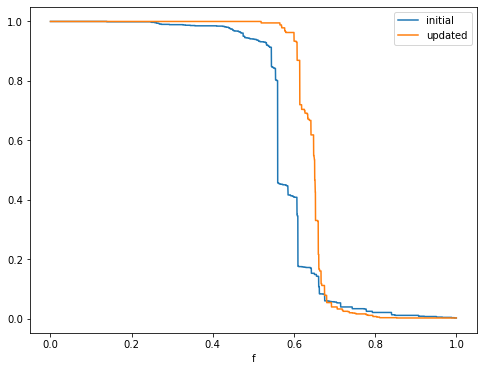

In [136]:
fig, ax = plt.subplots(figsize=(8,6))
for attack in ['initial', 'updated']:
    df = pd.DataFrame(data[attack], columns=['f', 'Sgcc'])
    df.plot(x='f', y='Sgcc', ax=ax, label=attack)